In [95]:
#!pip install hdbscan umap-learn

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import hdbscan

# HDBSCAN

In [55]:
def hdbscan_clustering(datasets):
    results = []
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    i = 0
    # Apply HDBSCAN and visualize clusters for each n-gram
    for name, df in datasets.items():
        model = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric='manhattan')
        labels = model.fit_predict(df)
        df['cluster'] = labels
    
        # Dimensionality reduction
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(df.drop(columns=["cluster"]))
    
        # Cluster statistics
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        silhouette = silhouette_score(df.drop(columns=["cluster"]), labels) if n_clusters > 1 else None
    
        results.append({
            "n_gram": name,
            "n_clusters": n_clusters,
            "n_noise": n_noise,
            "silhouette_score": silhouette
        })
    
        # Plot PCA cluster visualization
        ax = axes[i, 0]
        scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='rainbow', s=30)
        ax.set_title(f"HDBSCAN Clusters ({name})")
        ax.set_xlabel("PCA 1")
        ax.set_ylabel("PCA 2")
    
        # Plot condensed tree
        plt.sca(axes[i, 1])
        model.condensed_tree_.plot(select_clusters=True)
        axes[i, 1].set_title(f"Condensed Tree ({name})")
    
        # Plot single linkage tree
        plt.sca(axes[i, 2])
        model.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
        axes[i, 2].set_title(f"HDBSCAN Single Linkage Tree ({name})")
        i += 1
        
    plt.show()
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print(results_df)

### Ebola Virus

In [56]:
# Load and preprocess datasets
df3 = pd.read_csv("../csv_data/3gram_matrix_nucleotide_ebola.csv")
df3 = df3.drop(df3.columns[0], axis=1)
df5 = pd.read_csv("../csv_data/5gram_matrix_nucleotide_ebola.csv")
df5 = df5.drop(df5.columns[0], axis=1)
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_ebola.csv")
df7 = df7.drop(df7.columns[0], axis=1)

datasets = {
    "3-gram": df3,
    "5-gram": df5,
    "7-gram": df7
}

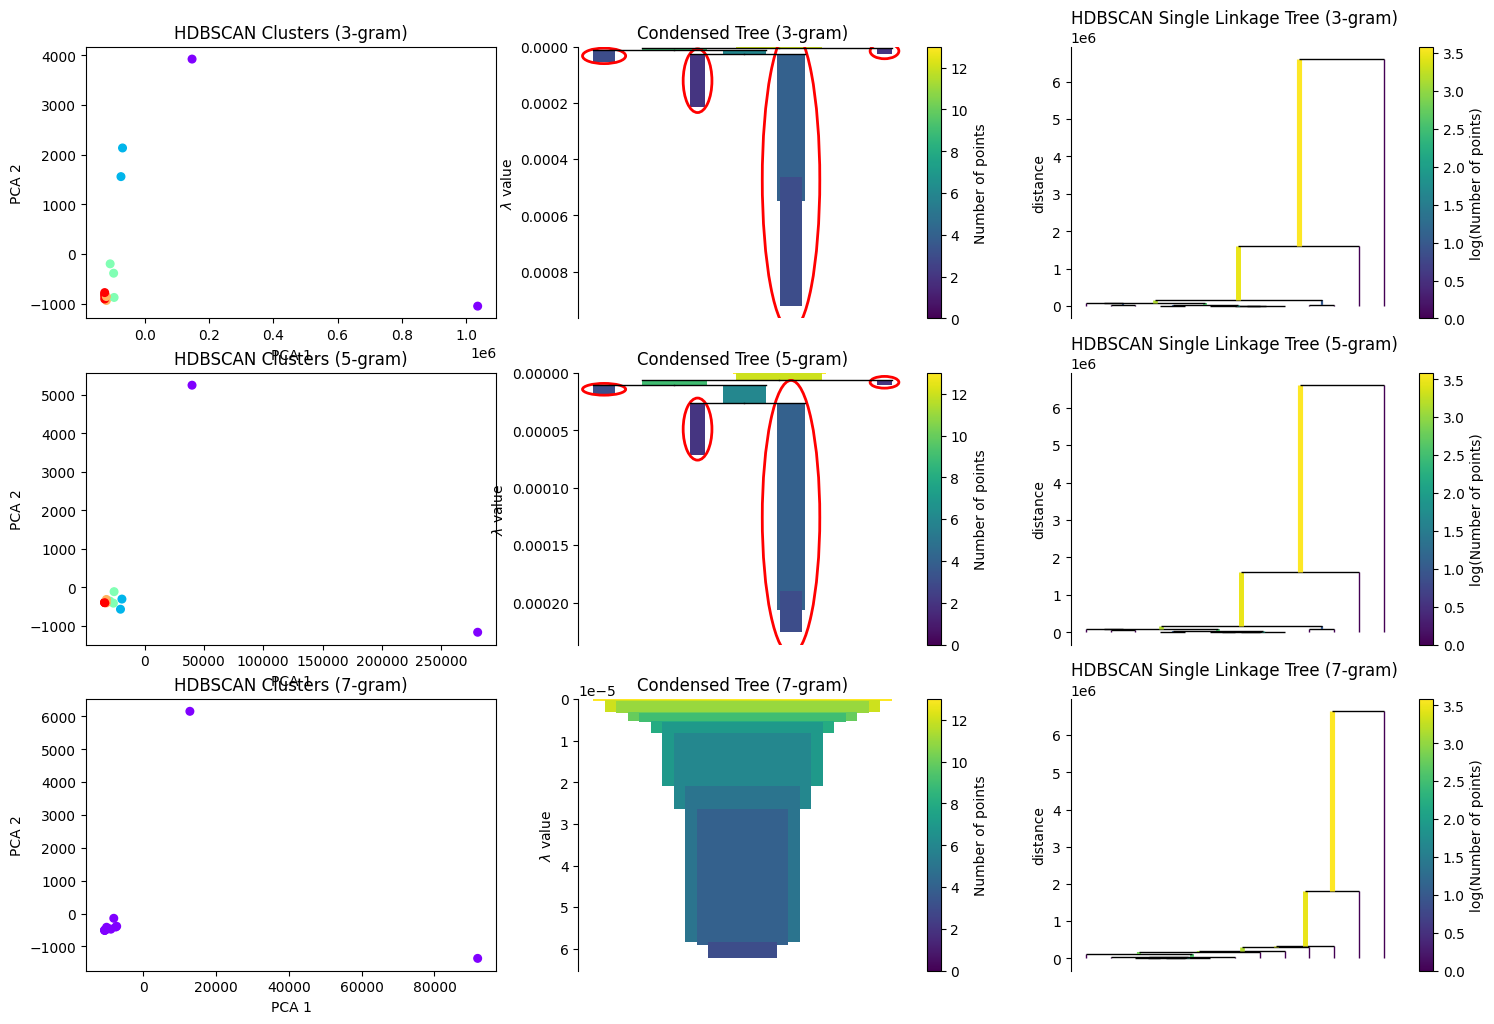

   n_gram  n_clusters  n_noise  silhouette_score
0  3-gram           4        2          0.604816
1  5-gram           4        2          0.465326
2  7-gram           0       13               NaN


In [57]:
hdbscan_clustering(datasets)

### Marburg Virus

In [58]:
# Load and preprocess datasets
df3 = pd.read_csv("../csv_data/3gram_matrix_nucleotide_marburg.csv")
df3 = df3.drop(df3.columns[0], axis=1)
df5 = pd.read_csv("../csv_data/5gram_matrix_nucleotide_marburg.csv")
df5 = df5.drop(df5.columns[0], axis=1)
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_marburg.csv")
df7 = df7.drop(df7.columns[0], axis=1)

datasets = {
    "3-gram": df3,
    "5-gram": df5,
    "7-gram": df7
}

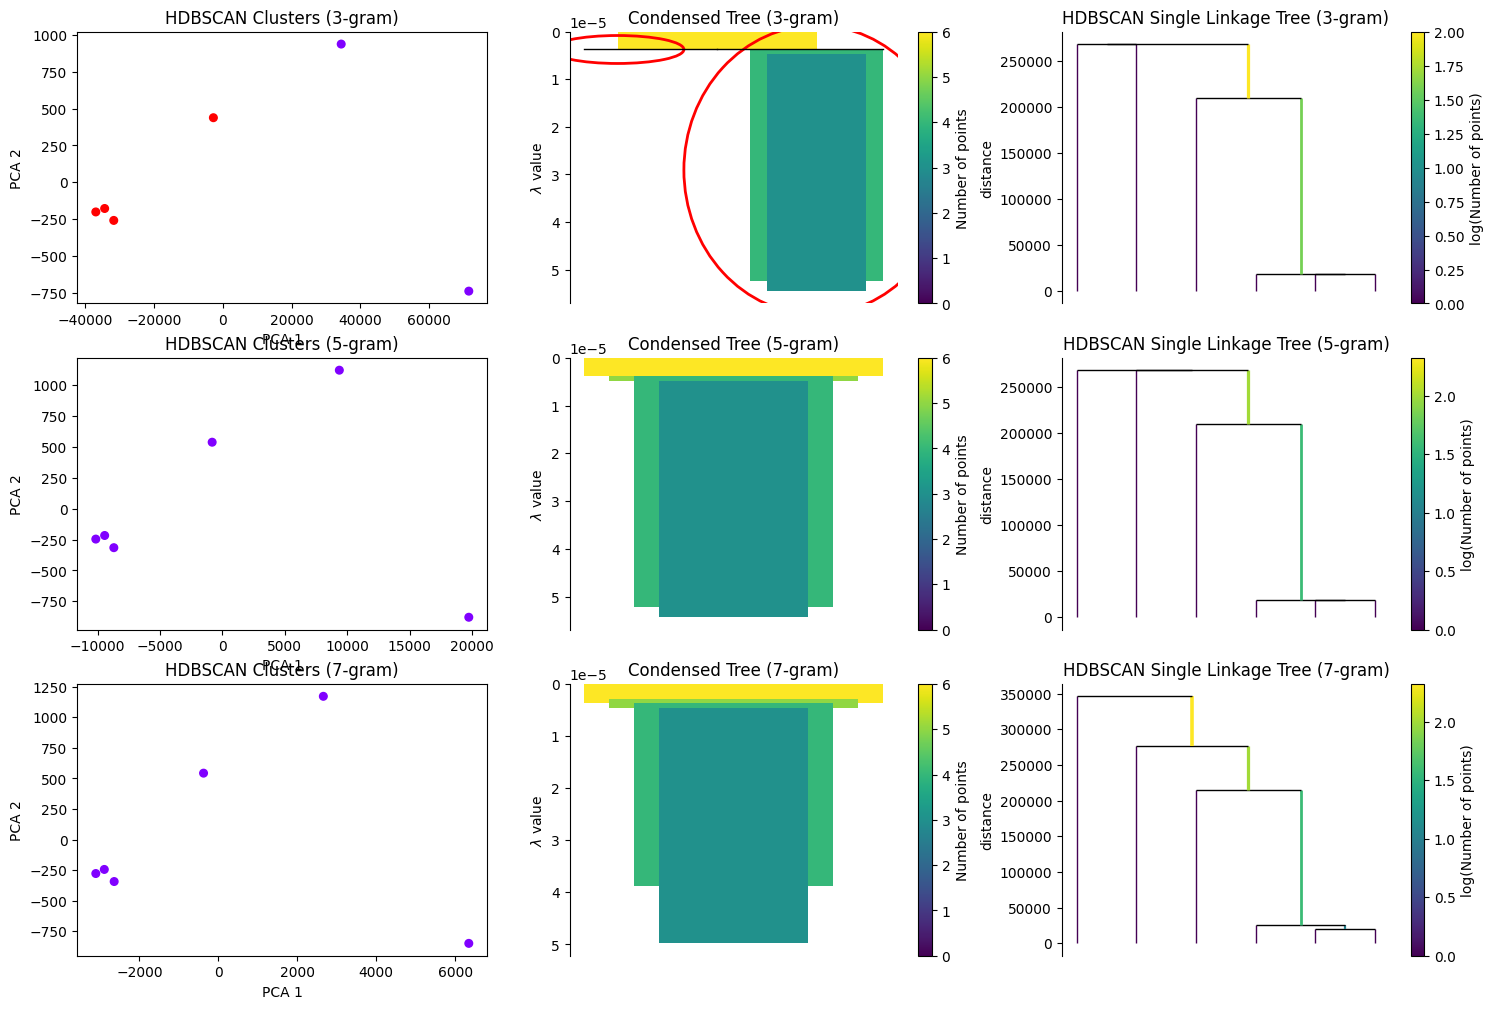

   n_gram  n_clusters  n_noise  silhouette_score
0  3-gram           2        0          0.667036
1  5-gram           0        6               NaN
2  7-gram           0        6               NaN


In [59]:
hdbscan_clustering(datasets)

### Mers Virus

In [61]:
# Load and preprocess datasets
df3 = pd.read_csv("../csv_data/3gram_matrix_nucleotide_mers.csv")
df3 = df3.drop(df3.columns[0], axis=1)
df5 = pd.read_csv("../csv_data/5gram_matrix_nucleotide_mers.csv")
df5 = df5.drop(df5.columns[0], axis=1)
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_mers.csv")
df7 = df7.drop(df7.columns[0], axis=1)

datasets = {
    "3-gram": df3,
    "5-gram": df5,
    "7-gram": df7
}

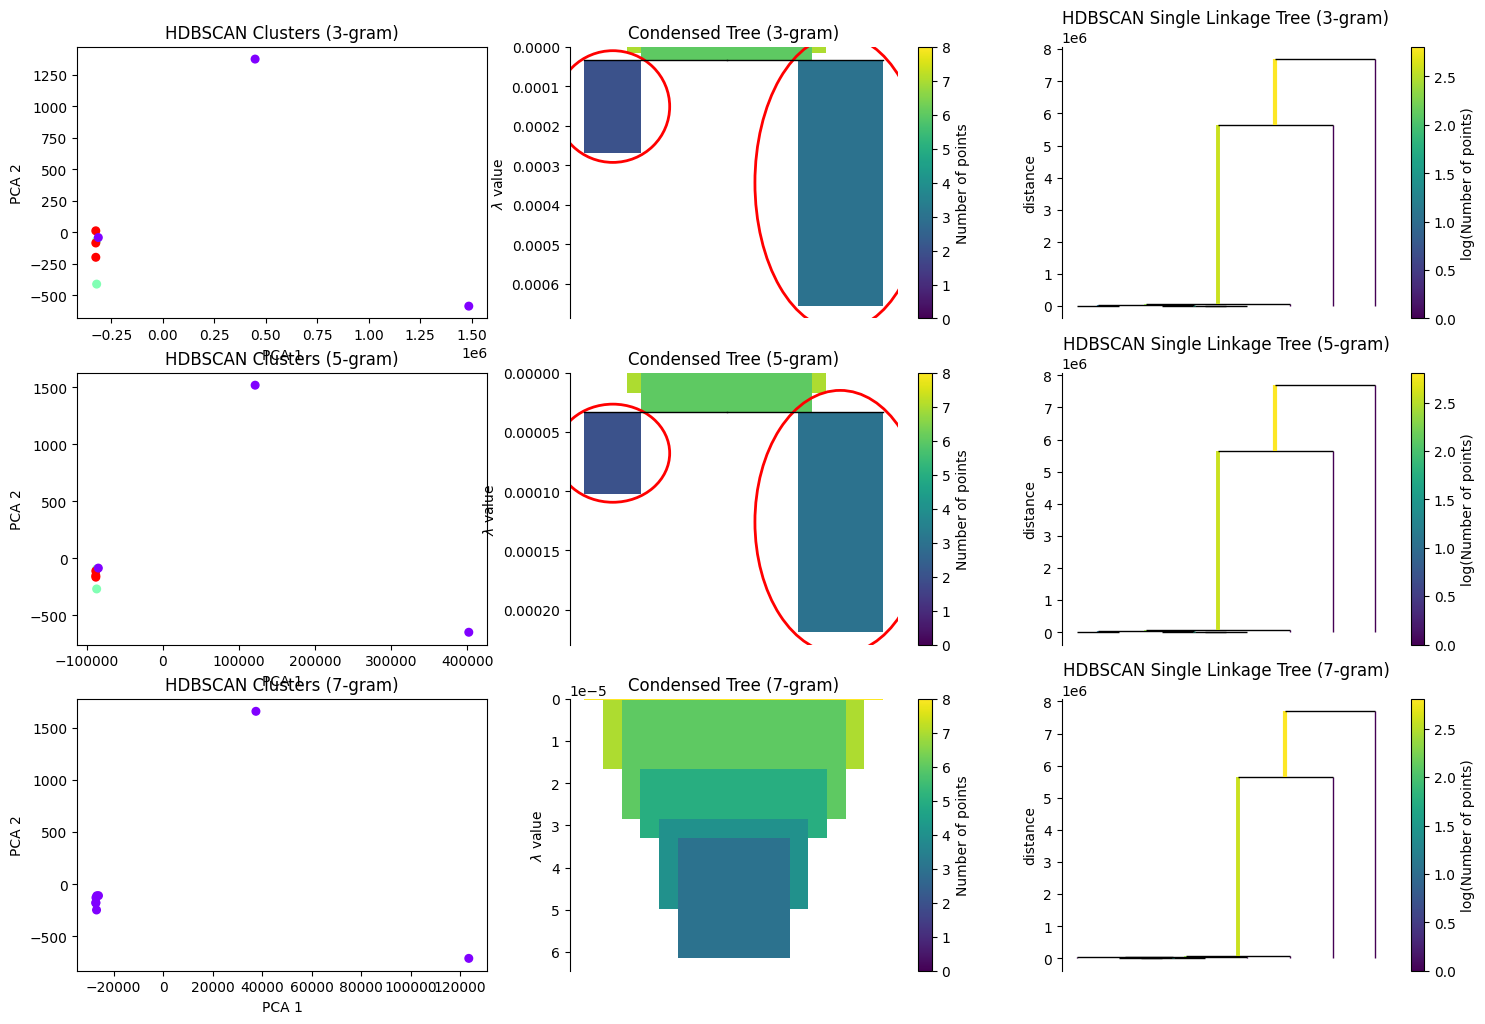

   n_gram  n_clusters  n_noise  silhouette_score
0  3-gram           2        3          0.442468
1  5-gram           2        3          0.350928
2  7-gram           0        8               NaN


In [62]:
hdbscan_clustering(datasets)

#  Hierarchical Clustering

In [63]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [82]:
def hierarchical_clustering(datasets):
    cluster_range = range(2, 6)
    results = {ngram: {"clusters": [], "silhouette": [], "calinski": [], "davies": []} for ngram in datasets}
    
    # Grid search
    for ngram, data in datasets.items():
        for k in cluster_range:
            model = AgglomerativeClustering(n_clusters=k)
            labels = model.fit_predict(data)
            results[ngram]["clusters"].append(k)
            results[ngram]["silhouette"].append(silhouette_score(data, labels))
            results[ngram]["calinski"].append(calinski_harabasz_score(data, labels))
            results[ngram]["davies"].append(davies_bouldin_score(data, labels))
    
    # Plot metric scores for each n-gram
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    metrics = ["silhouette", "calinski", "davies"]
    
    for i, (ngram, scores) in enumerate(results.items()):
        for j, metric in enumerate(metrics):
            ax = axes[i, j]
            ax.plot(scores["clusters"], scores[metric], marker='o')
            ax.set_title(f"{ngram} - {metric}")
            ax.set_xlabel("Number of Clusters")
            ax.set_ylabel(metric.capitalize())
    
    plt.tight_layout()
    plt.show()

### Ebola virus

In [83]:
# Load and preprocess datasets
df3 = pd.read_csv("../csv_data/3gram_matrix_nucleotide_ebola.csv")
df3 = df3.drop(df3.columns[0], axis=1)
df5 = pd.read_csv("../csv_data/5gram_matrix_nucleotide_ebola.csv")
df5 = df5.drop(df5.columns[0], axis=1)
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_ebola.csv")
df7 = df7.drop(df7.columns[0], axis=1)

datasets = {
    "3-gram": df3,
    "5-gram": df5,
    "7-gram": df7
}

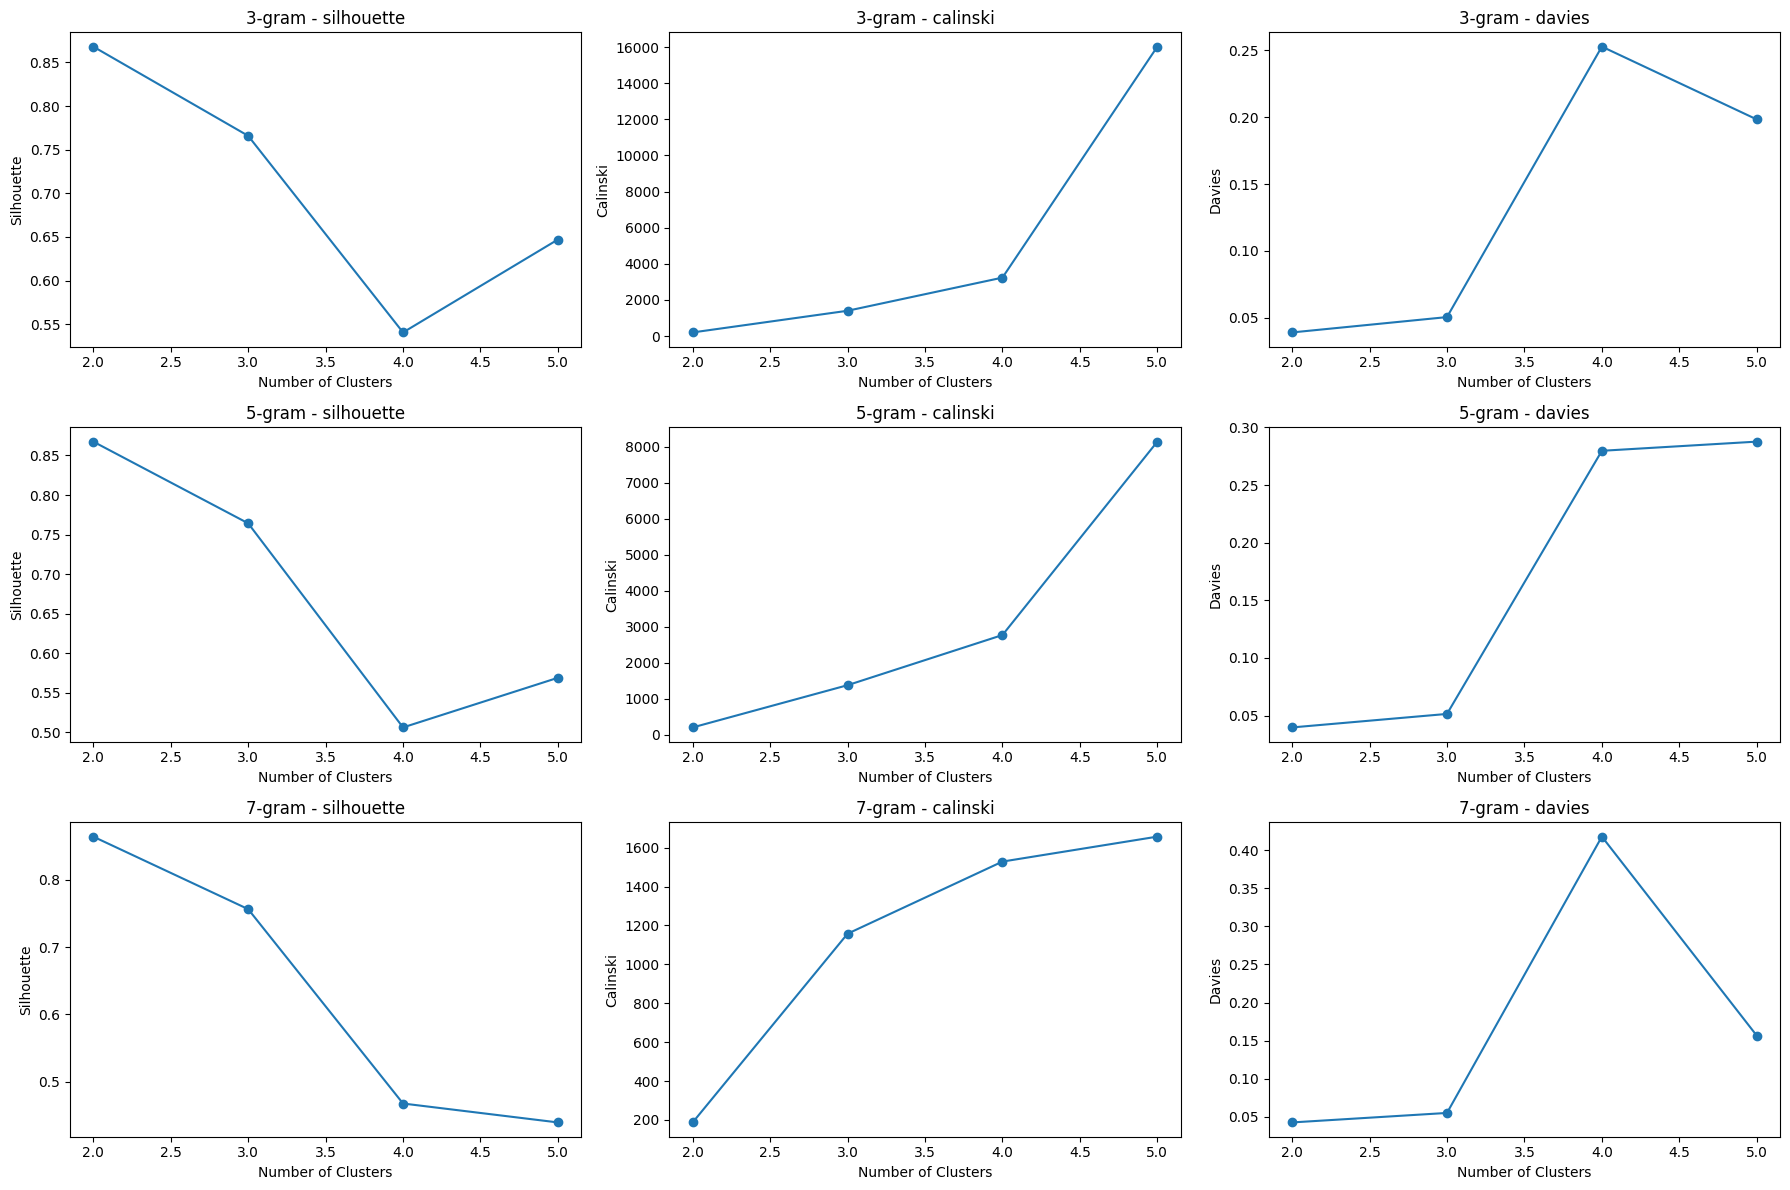

In [84]:
hierarchical_clustering(datasets)

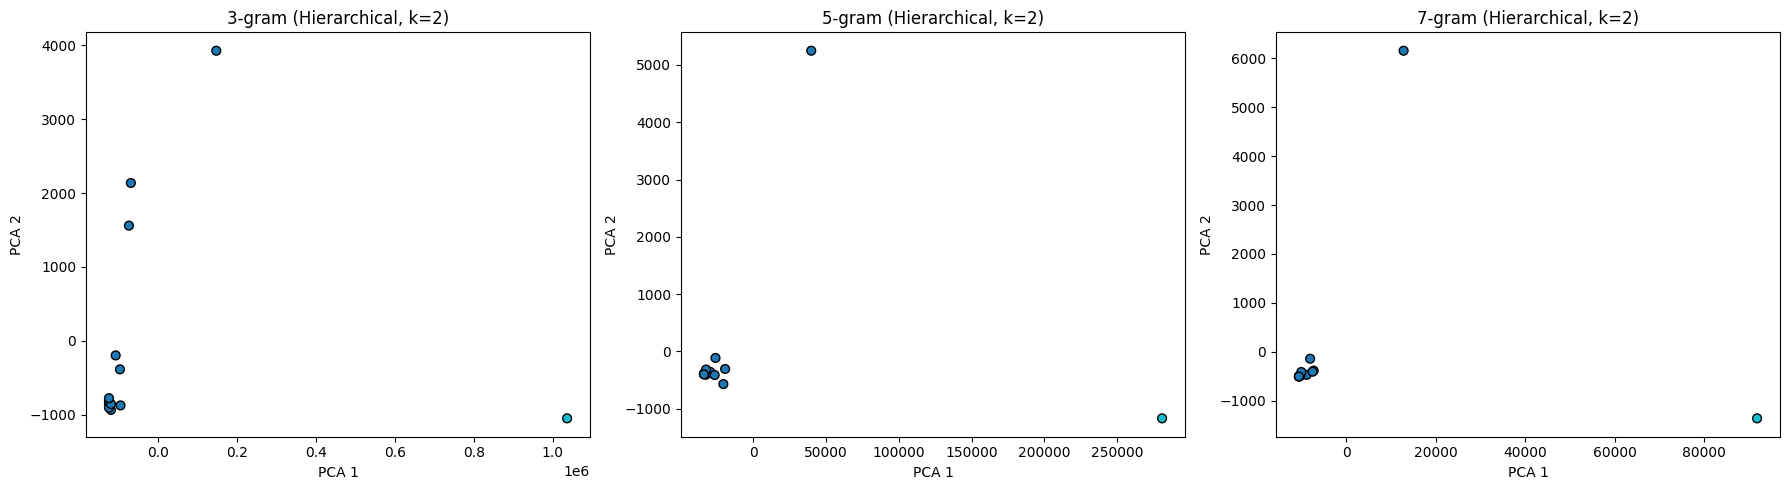

In [85]:
# PCA visualization
k = 2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ngram, data) in zip(axes, datasets.items()):
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(data)
    
    ax.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(f"{ngram} (Hierarchical, k={k})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

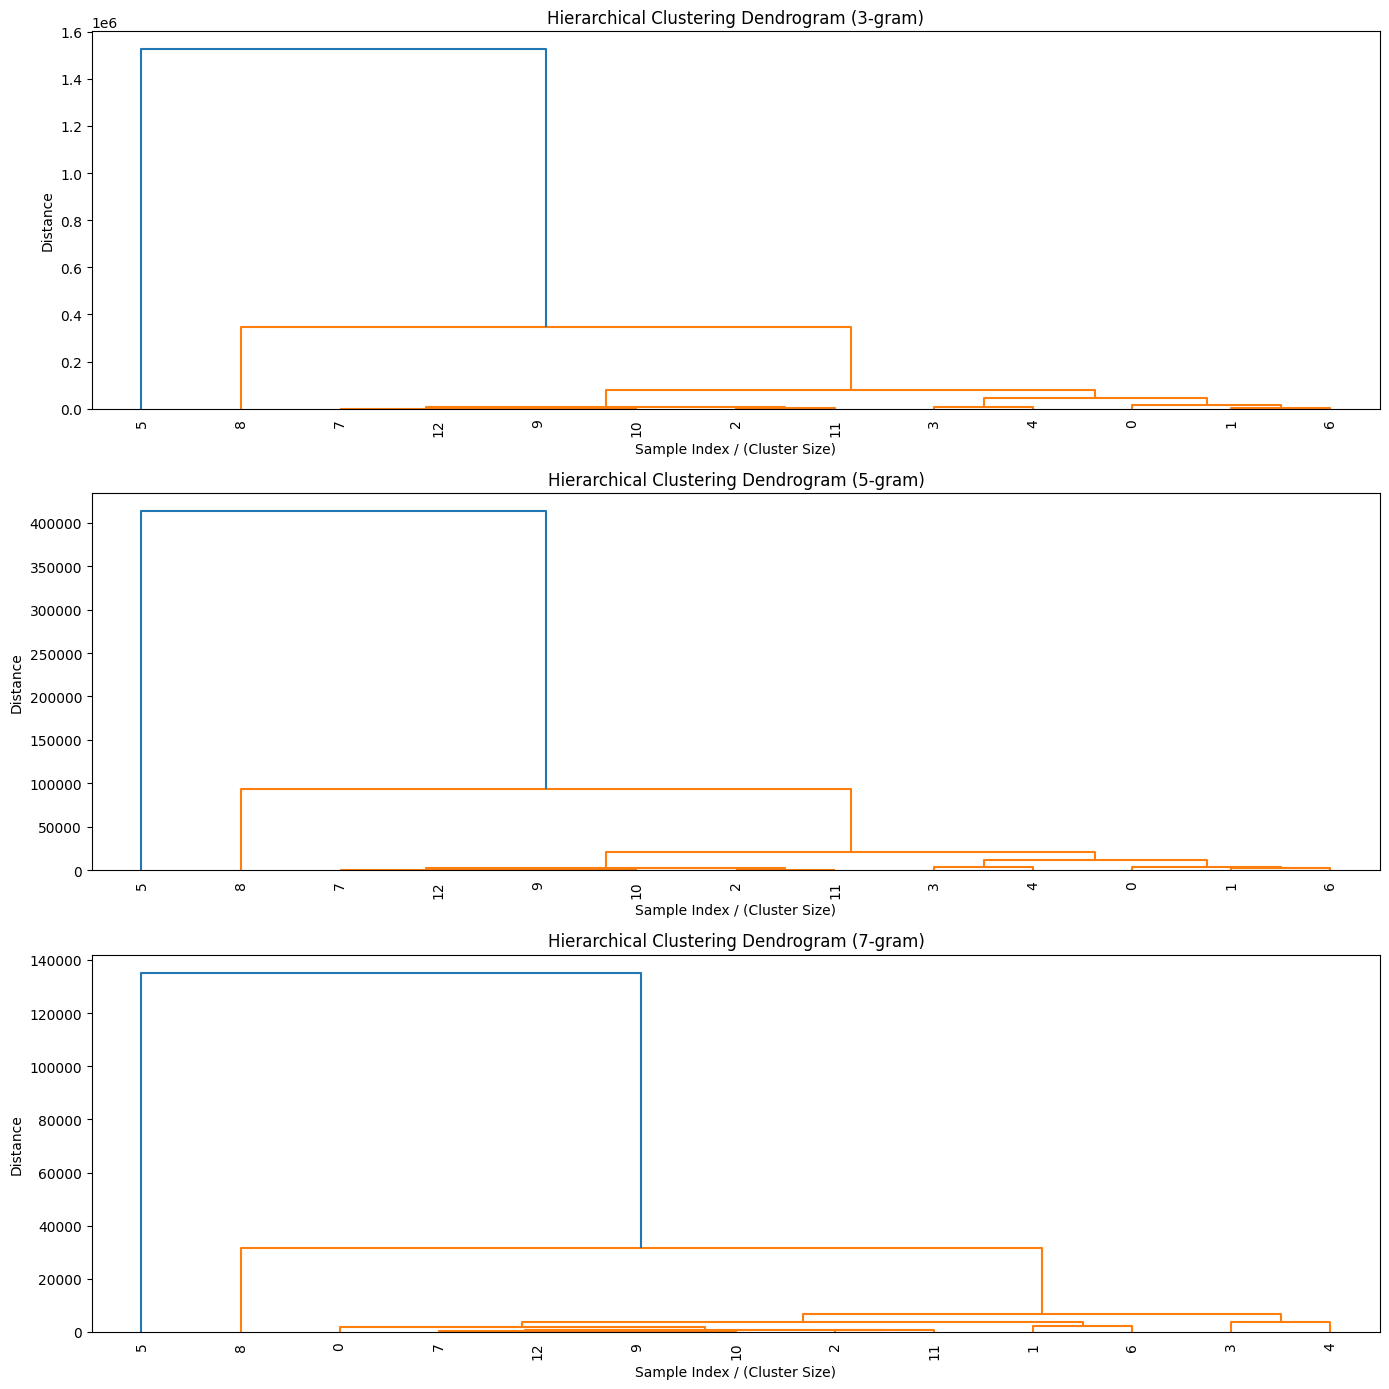

In [86]:
# Plot dendrograms
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, (label, data) in zip(axes, datasets.items()):
    linked = linkage(data, method='ward')
    
    dendrogram(linked,
               truncate_mode='level',
               p=10,
               ax=ax,
               leaf_rotation=90.,
               leaf_font_size=10.,
               show_contracted=True)
    
    ax.set_title(f"Hierarchical Clustering Dendrogram ({label})")
    ax.set_xlabel("Sample Index / (Cluster Size)")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()

### Marburg Virus

In [87]:
df3 = pd.read_csv("../csv_data/3gram_matrix_nucleotide_marburg.csv")
df3 = df3.drop(df3.columns[0], axis=1)
df5 = pd.read_csv("../csv_data/5gram_matrix_nucleotide_marburg.csv")
df5 = df5.drop(df5.columns[0], axis=1)
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_marburg.csv")
df7 = df7.drop(df7.columns[0], axis=1)

datasets = {
    "3-gram": df3,
    "5-gram": df5,
    "7-gram": df7
}

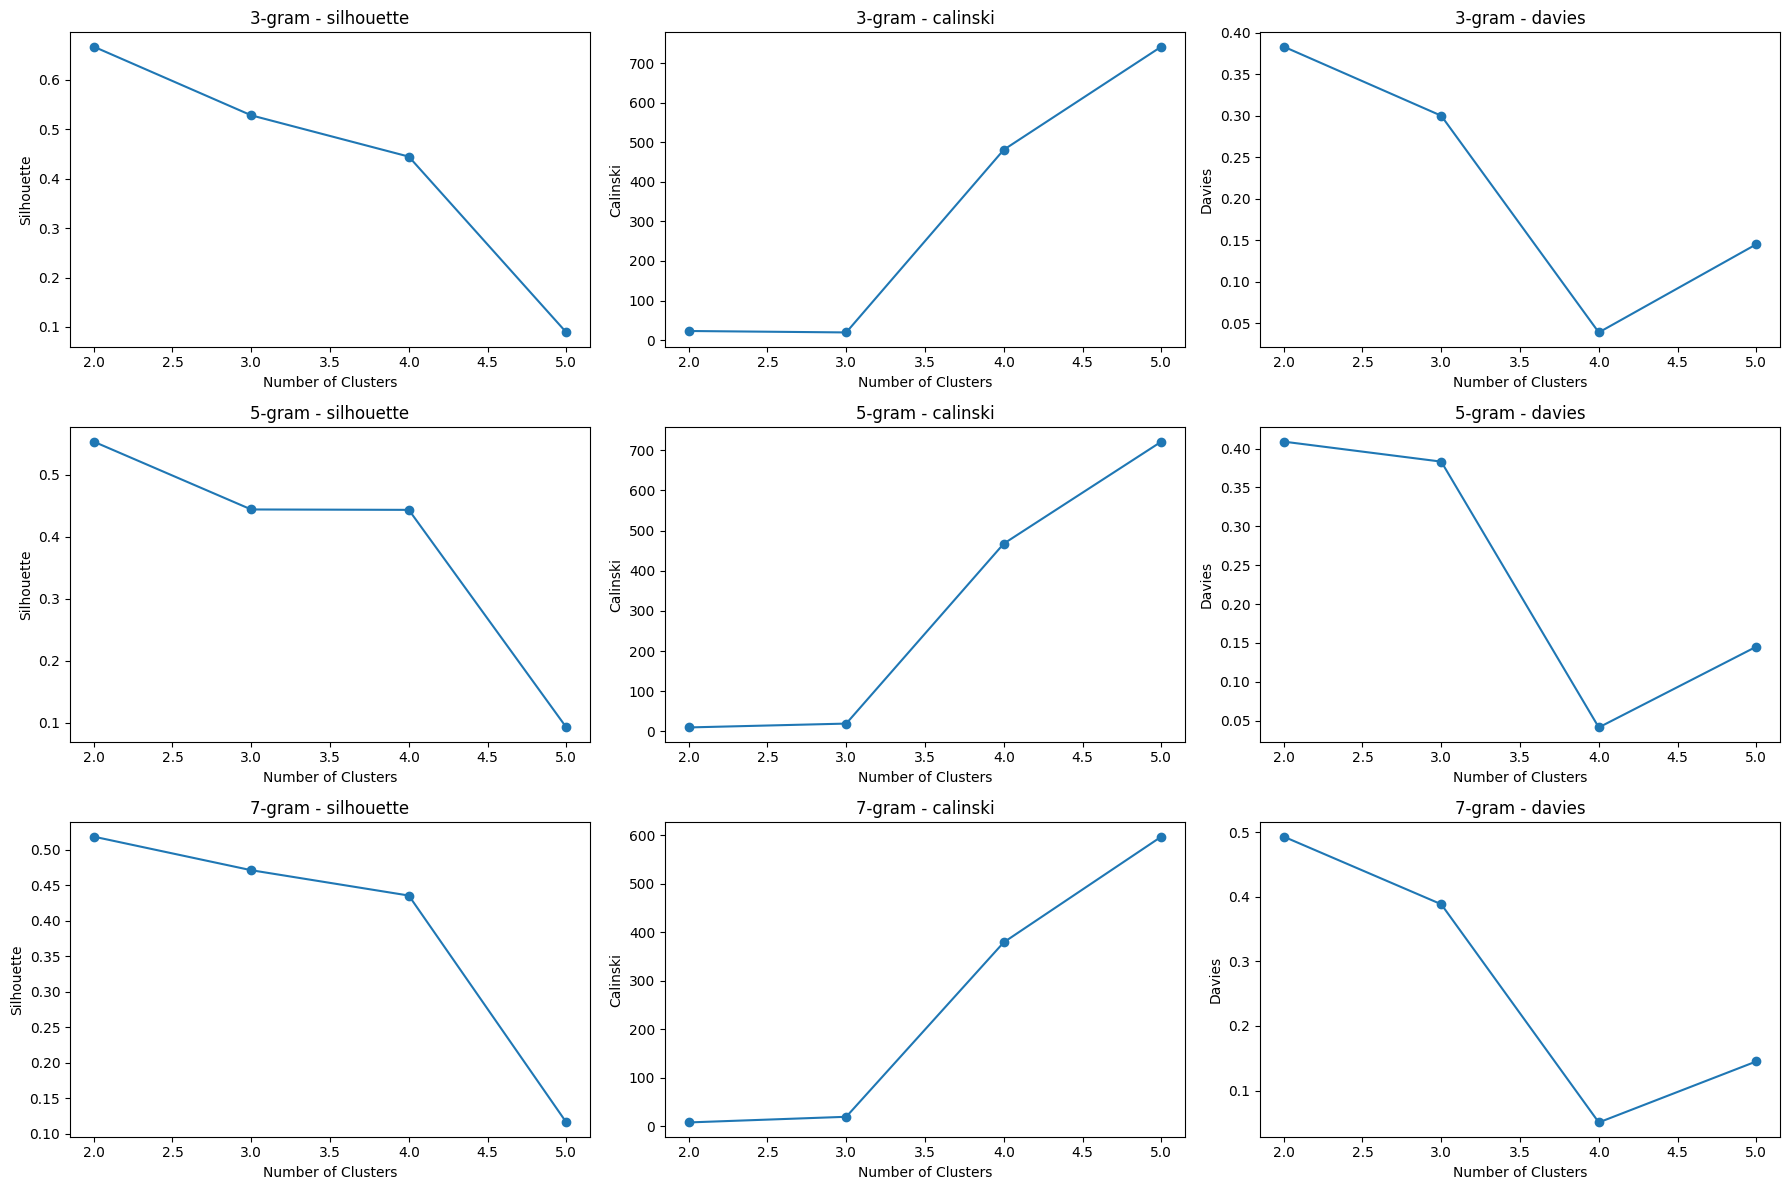

In [88]:
hierarchical_clustering(datasets)

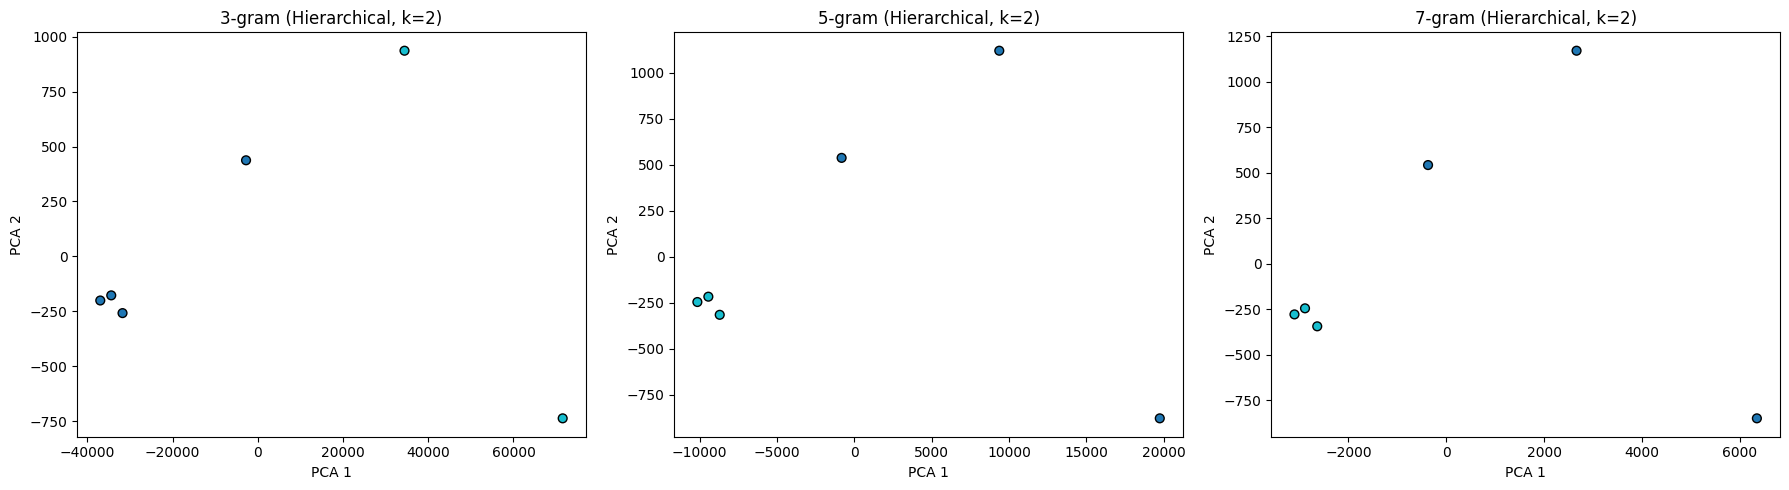

In [89]:
k = 2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ngram, data) in zip(axes, datasets.items()):
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(data)
    
    ax.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(f"{ngram} (Hierarchical, k={k})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

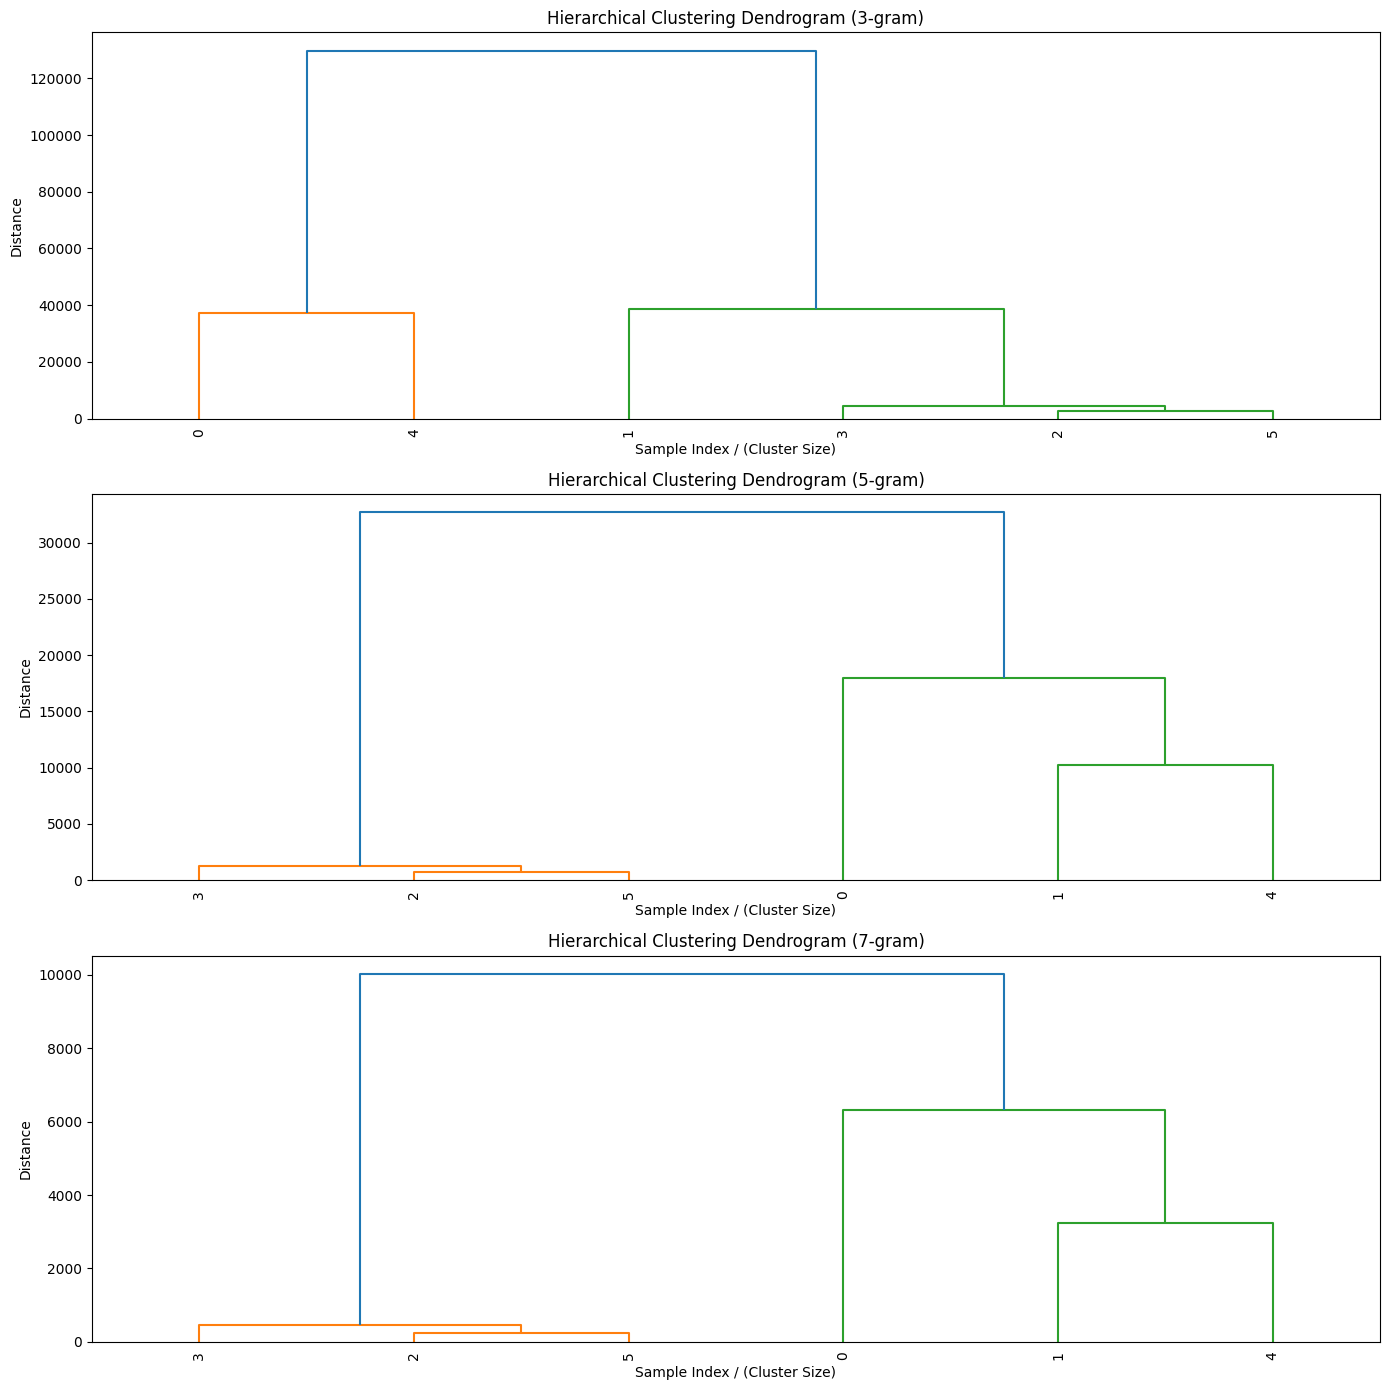

In [90]:
# Plot dendrograms
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, (label, data) in zip(axes, datasets.items()):
    linked = linkage(data, method='ward')
    
    dendrogram(linked,
               truncate_mode='level',
               p=10,
               ax=ax,
               leaf_rotation=90.,
               leaf_font_size=10.,
               show_contracted=True)
    
    ax.set_title(f"Hierarchical Clustering Dendrogram ({label})")
    ax.set_xlabel("Sample Index / (Cluster Size)")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()

### Mers Virus

In [91]:
df3 = pd.read_csv("../csv_data/3gram_matrix_nucleotide_mers.csv")
df3 = df3.drop(df3.columns[0], axis=1)
df5 = pd.read_csv("../csv_data/5gram_matrix_nucleotide_mers.csv")
df5 = df5.drop(df5.columns[0], axis=1)
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_mers.csv")
df7 = df7.drop(df7.columns[0], axis=1)

datasets = {
    "3-gram": df3,
    "5-gram": df5,
    "7-gram": df7
}

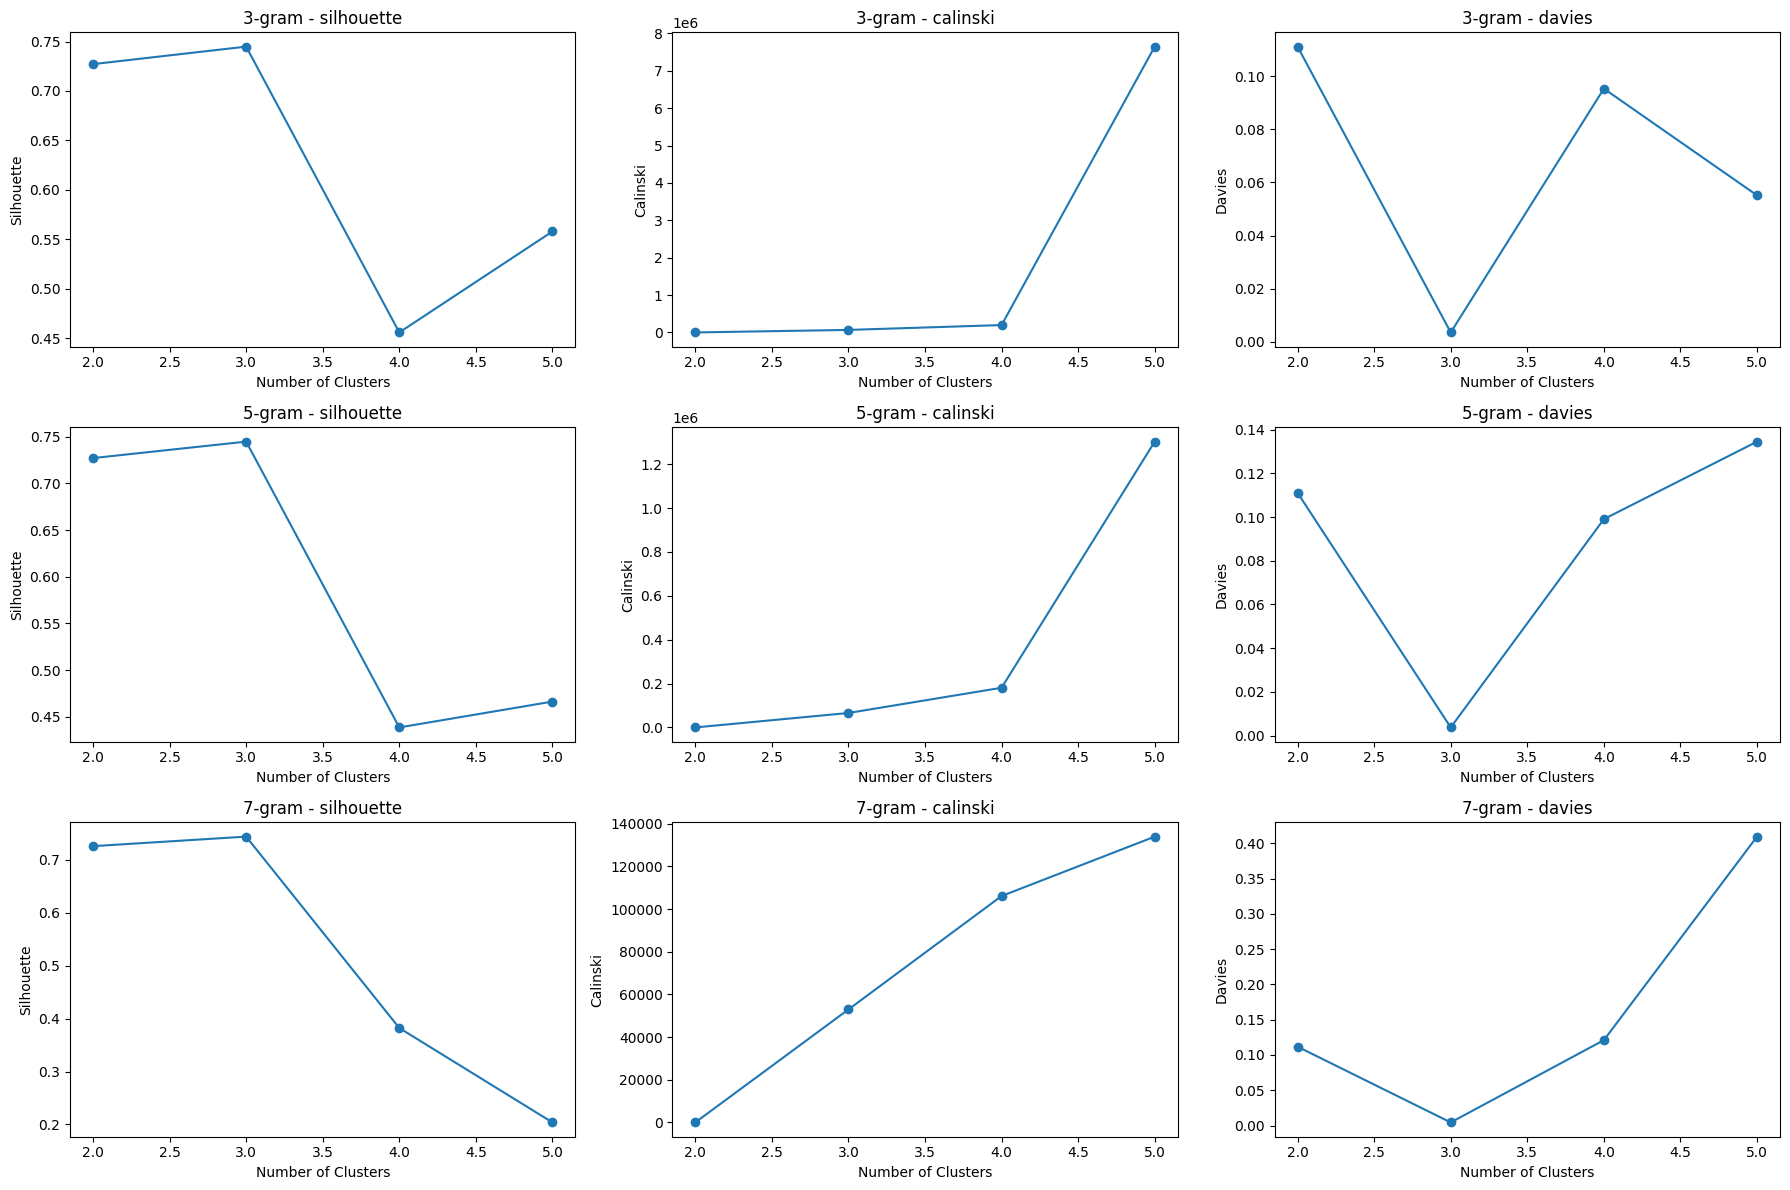

In [92]:
hierarchical_clustering(datasets)

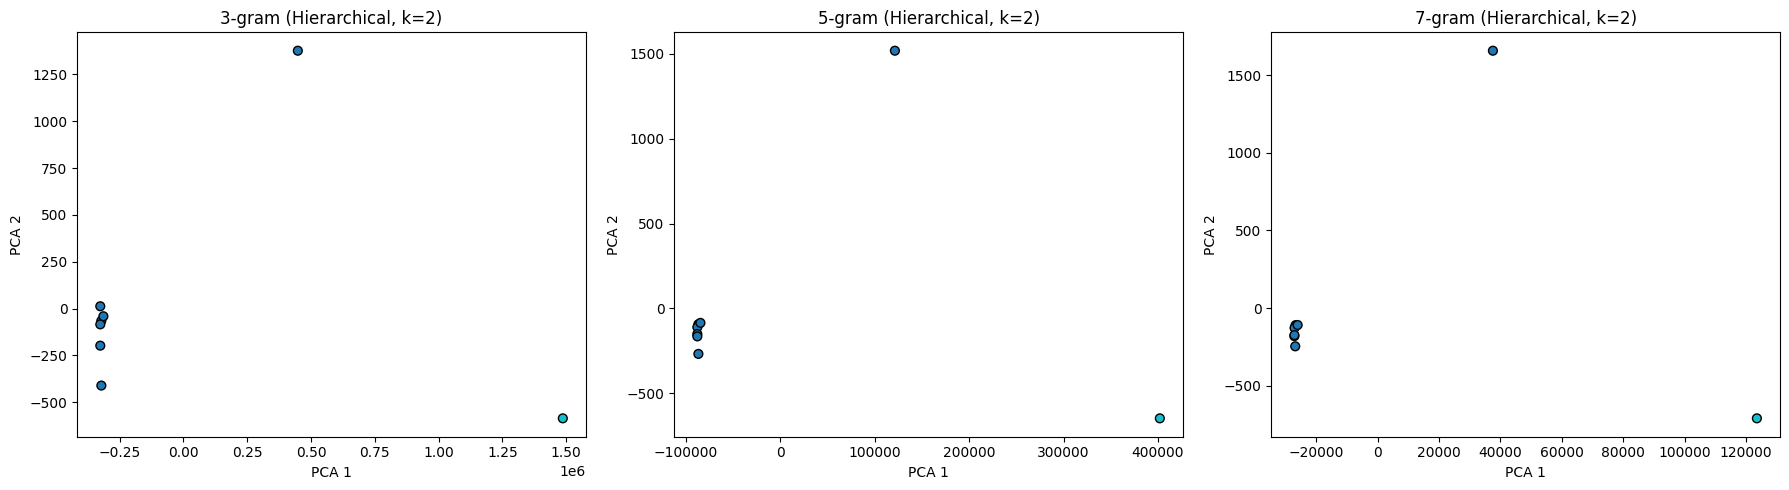

In [93]:
k = 2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ngram, data) in zip(axes, datasets.items()):
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(data)
    
    ax.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(f"{ngram} (Hierarchical, k={k})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

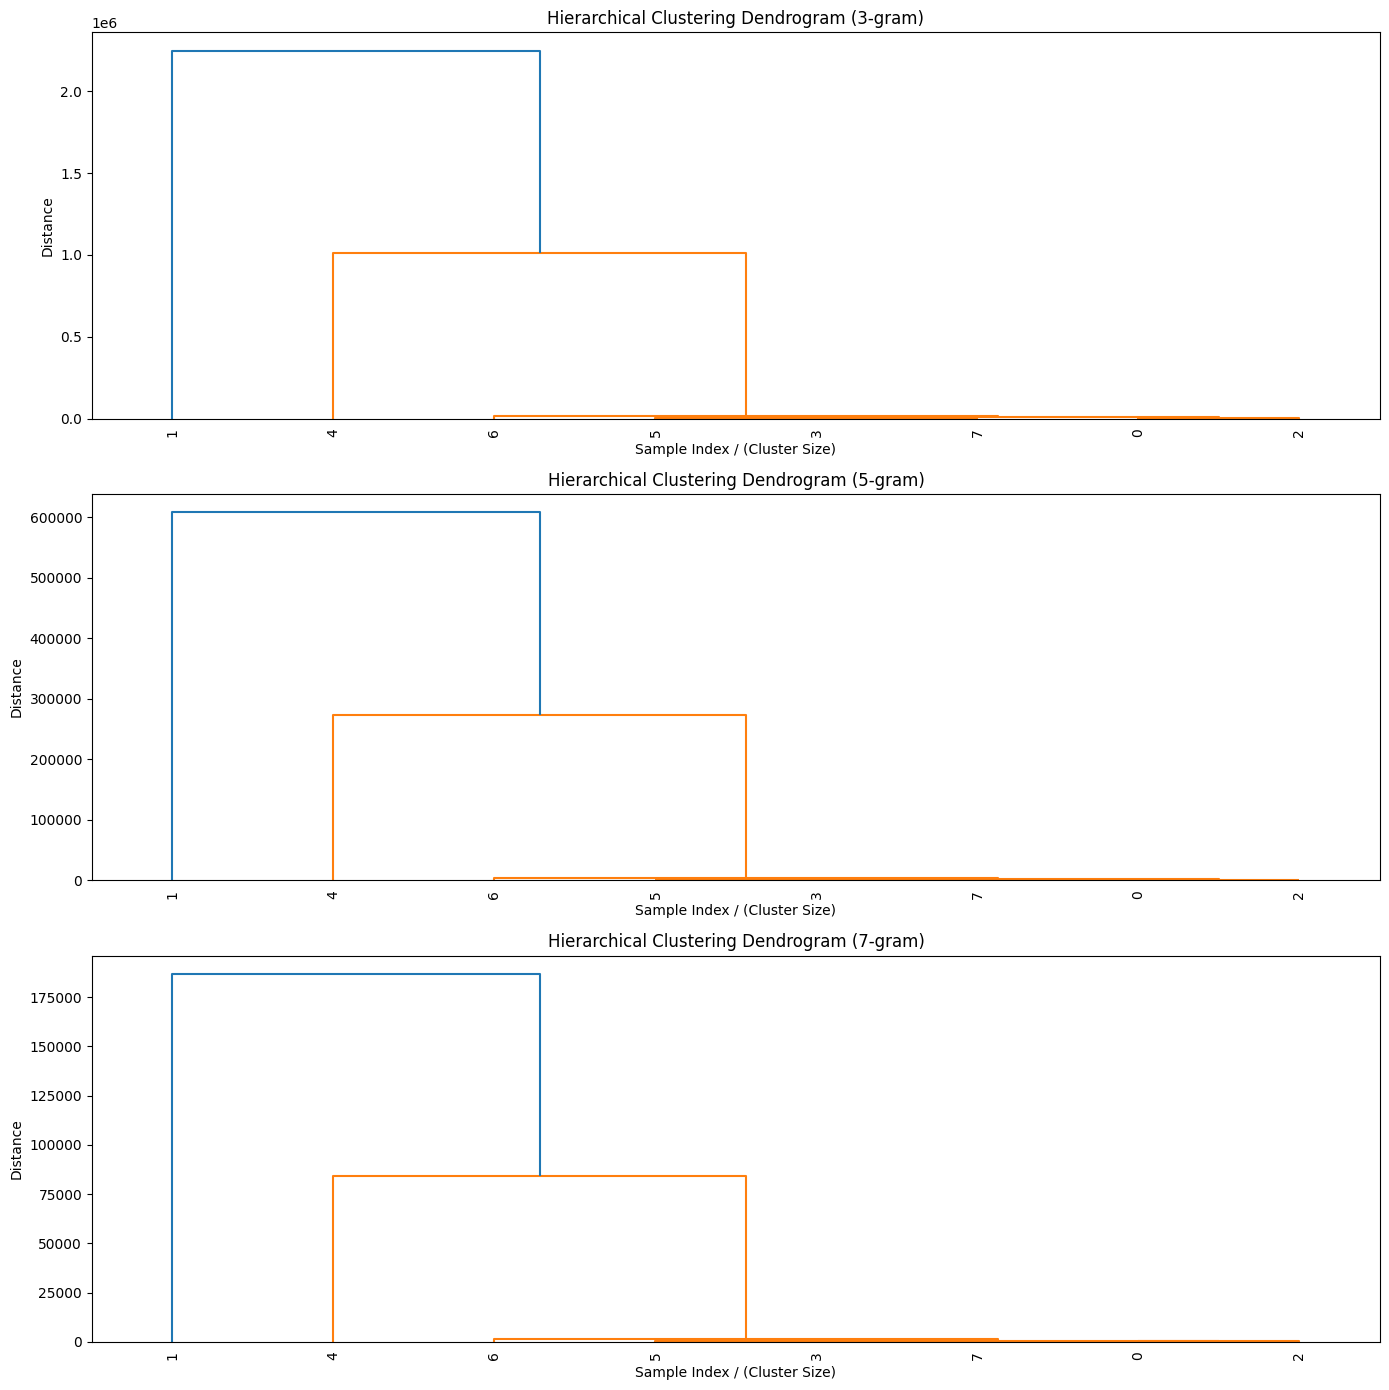

In [94]:
# Plot dendrograms
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, (label, data) in zip(axes, datasets.items()):
    linked = linkage(data, method='ward')
    
    dendrogram(linked,
               truncate_mode='level',
               p=10,
               ax=ax,
               leaf_rotation=90.,
               leaf_font_size=10.,
               show_contracted=True)
    
    ax.set_title(f"Hierarchical Clustering Dendrogram ({label})")
    ax.set_xlabel("Sample Index / (Cluster Size)")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()

# SOM

In [147]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
def som(datasets, som_x=10, som_y=10, iterations=1000):
    """
    Trains and visualizes SOMs on nucleotide n-gram datasets.
    Colors are based on 'virus_type'.
    """
    results = []
    fig, axes = plt.subplots(len(datasets), 2, figsize=(12, 5 * len(datasets)))

    if len(datasets) == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, (ngram, df) in enumerate(datasets.items()):
        labels = df['virus_type'].values
        features = df.drop(columns=['virus_type']).values

        # Standardize feature data
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        # Train SOM
        som = MiniSom(x=som_x, y=som_y, input_len=features_scaled.shape[1], sigma=1.0, learning_rate=0.5)
        som.random_weights_init(features_scaled)
        som.train_random(features_scaled, num_iteration=iterations)

        # Get BMU coordinates
        bmu_coords = np.array([som.winner(x) for x in features_scaled])

        # Map virus labels to color indices
        unique_labels = sorted(set(labels))
        label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
        color_labels = np.array([label_to_int[label] for label in labels])

        # Save number of unique BMUs
        results.append({
            "n_gram": ngram,
            "n_clusters": len(np.unique(bmu_coords, axis=0))
        })

        # Plot 1: U-Matrix
        ax1 = axes[i, 0]
        ax1.set_title(f"SOM U-Matrix ({ngram})")
        im = ax1.pcolor(som.distance_map().T, cmap='bone_r')
        fig.colorbar(im, ax=ax1)

        # Plot 2: Colored SOM map by virus type
        ax2 = axes[i, 1]
        ax2.set_title(f"SOM Colored by Virus Type ({ngram})")
        scatter = ax2.scatter(bmu_coords[:, 0], bmu_coords[:, 1], c=color_labels, cmap='tab10', s=40)
        ax2.set_xlim(0, som_x)
        ax2.set_ylim(0, som_y)
        ax2.legend(handles=scatter.legend_elements()[0], labels=unique_labels, title='Virus Type')

    plt.tight_layout()
    plt.show()

    return results

In [149]:
df6 = pd.read_csv("../csv_data/6gram_matrix_nucleotide_combined.csv")
df7 = pd.read_csv("../csv_data/7gram_matrix_nucleotide_combined.csv")
df8 = pd.read_csv("../csv_data/8gram_matrix_nucleotide_combined.csv")
df9 = pd.read_csv("../csv_data/9gram_matrix_nucleotide_combined.csv")

datasets = {
    "6-gram": df6,
    "7-gram": df7,
    "8-gram": df8,
    "9-gram": df9
}

In [ ]:
som(datasets, som_x=10, som_y=10, iterations=2000)

# Affinity Propagation

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [169]:
def affinity_propagation_analysis(data):
    similarity = cosine_similarity(data)
    ap = AffinityPropagation(affinity='precomputed', random_state=42)
    ap.fit(similarity)
    labels = ap.labels_
    exemplars = ap.cluster_centers_indices_
    print(f"Number of clusters: {len(exemplars)}")
    return labels, exemplars, similarity

In [170]:
def plot_all_in_subplots(datasets, label_column='virus_type'):
    """
    Visualize Affinity Propagation clustering with fixed external labels as color.
    Color shows known categories.
    """
    fig = plt.figure(figsize=(24, 20))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    for col_index, (name, df) in enumerate(datasets.items()):
        # Extract labels and features
        labels_true = df[label_column].values
        features = df.drop(columns=['virus_type', 'protein_type'], errors='ignore').values

        # Run Affinity Propagation
        labels_pred, exemplars, similarity = affinity_propagation_analysis(features)

        # Map label_column values to color codes
        unique_labels = sorted(set(labels_true))
        label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
        color_values = np.array([label_to_int[label] for label in labels_true])

        # PCA 2D plot
        ax1 = fig.add_subplot(4, 3, 1 + col_index)
        pca_2d = PCA(n_components=2)
        reduced_2d = pca_2d.fit_transform(features)
        scatter = ax1.scatter(reduced_2d[:, 0], reduced_2d[:, 1], c=color_values, cmap='tab10', alpha=0.7)
        ax1.scatter(reduced_2d[exemplars, 0], reduced_2d[exemplars, 1], c='red', marker='X', s=150, label='Exemplars')
        ax1.set_title(f"{name} - PCA 2D Colored by {label_column}")
        ax1.set_xlabel("PC1")
        ax1.set_ylabel("PC2")
        ax1.legend(*scatter.legend_elements(), title=label_column)

        # PCA 3D plot
        ax2 = fig.add_subplot(4, 3, 4 + col_index, projection='3d')
        pca_3d = PCA(n_components=3)
        reduced_3d = pca_3d.fit_transform(features)
        sc = ax2.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2],
                         c=color_values, cmap='tab10', alpha=0.7)
        ax2.scatter(reduced_3d[exemplars, 0], reduced_3d[exemplars, 1], reduced_3d[exemplars, 2],
                    c='red', marker='X', s=150, label='Exemplars')
        ax2.set_title(f"{name} - PCA 3D Colored by {label_column}")
        ax2.set_xlabel("PC1")
        ax2.set_ylabel("PC2")
        ax2.set_zlabel("PC3")
        ax2.legend(*sc.legend_elements(), title=label_column)

        # Similarity matrix
        ax3 = fig.add_subplot(4, 3, 7 + col_index)
        idx = np.argsort(labels_pred)
        sorted_sim = similarity[idx][:, idx]
        sns.heatmap(sorted_sim, cmap='viridis', ax=ax3)
        ax3.set_title(f"{name} - Similarity Matrix")

        # Exemplars Graph
        ax4 = fig.add_subplot(4, 3, 10 + col_index)
        G = nx.Graph()
        for n in range(len(labels_pred)):
            G.add_node(n, cluster=labels_pred[n])
        for cl_idx, ex in enumerate(exemplars):
            members = np.where(labels_pred == cl_idx)[0]
            for m in members:
                if m != ex:
                    G.add_edge(ex, m)
        pos = nx.spring_layout(G, seed=42)
        node_colors = [color_values[n] for n in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='tab10', node_size=50, alpha=0.8, ax=ax4)
        nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax4)
        nx.draw_networkx_nodes(G, pos, nodelist=exemplars, node_color='red', node_size=150, label='Exemplars', ax=ax4)
        ax4.set_title(f"{name} - Graph Colored by {label_column}")
        ax4.axis('off')

    plt.show()

In [ ]:
plot_all_in_subplots(datasets, label_column='virus_type')